# Which Skills Have the Highest Likelihood of Appearing on a Job Posting (Most In-Demand Skills)?

### Methodology 

1. Clean the skill column and create a table exploring the skill count of job postings
2. Create a visualisation demonstrating the skill count of job postings
3. Calculate the percentage likelihood of a skill appearing on a job posting
4. Create a graph showing percentage likelihood of a skill appearing on a job postings

NOTE: all explorations will focus on the following: 
- Roles: 
  - Data Analyst
  - Data Engineer
  - Data Scientist
- Countries: 
  - United Kingdom
  - United States
  - India

### Import Libraries

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Vikram Kapoor\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Part 1 - Clean the Skill Column and Create a Table Exploring the Skill Count of Job Postings

### Filter Dataset for Specified Roles and Countries

In [2]:
# List Containing Job Roles: Data Analyst, Data Engineer, Data Science
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List Containing Countries: United Kingdom, United States, India
countries = ['United Kingdom', 'United States', 'India']

# Filter the Dataset for Job Roles and Countries
df_job_ctry = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(countries))]

### Explode the Skill Column

In [3]:
# Explode the Job Skills Column
df_skills = df_job_ctry.explode('job_skills')

### Create a Table Exploring the Skill Count of Job Postings

In [4]:
# Create a Table Exploring the Skill Count of Job Postings Using Groupby()
df_skills_count = df_skills.groupby(['job_country', 'job_title_short', 'job_skills']).size()

# Set / Name Skill Count as the Index
df_skills_count = df_skills_count.reset_index(name = 'skill_count')

# Filter for India and Data Analyst Roles Only
df_da_ind = df_skills_count[(df_skills_count['job_country'] == 'India') & (df_skills_count['job_title_short'] == 'Data Analyst')]

# Order the Table & Obtain Top 5
df_da_ind = df_da_ind.sort_values(by = 'skill_count', ascending = False)
df_da_ind.head(5)

,job_country,job_title_short,job_skills,skill_count
141,India,Data Analyst,sql,3159
111,India,Data Analyst,python,2203
38,India,Data Analyst,excel,2117
151,India,Data Analyst,tableau,1667
106,India,Data Analyst,power bi,1286


NOTE: This process can be repeated as done in the EDA section to generate tables for each country and job title combination

## Part 2 - Create a Visualisation Demonstrating the Skill Count of Job Postings

The below code recalls:
- job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
- countries = ['United Kingdom', 'United States', 'India']
- df_skills_count = df_skills.groupby(['job_country', 'job_title_short', 'job_skills']).size().reset_index(name = 'skill_count')

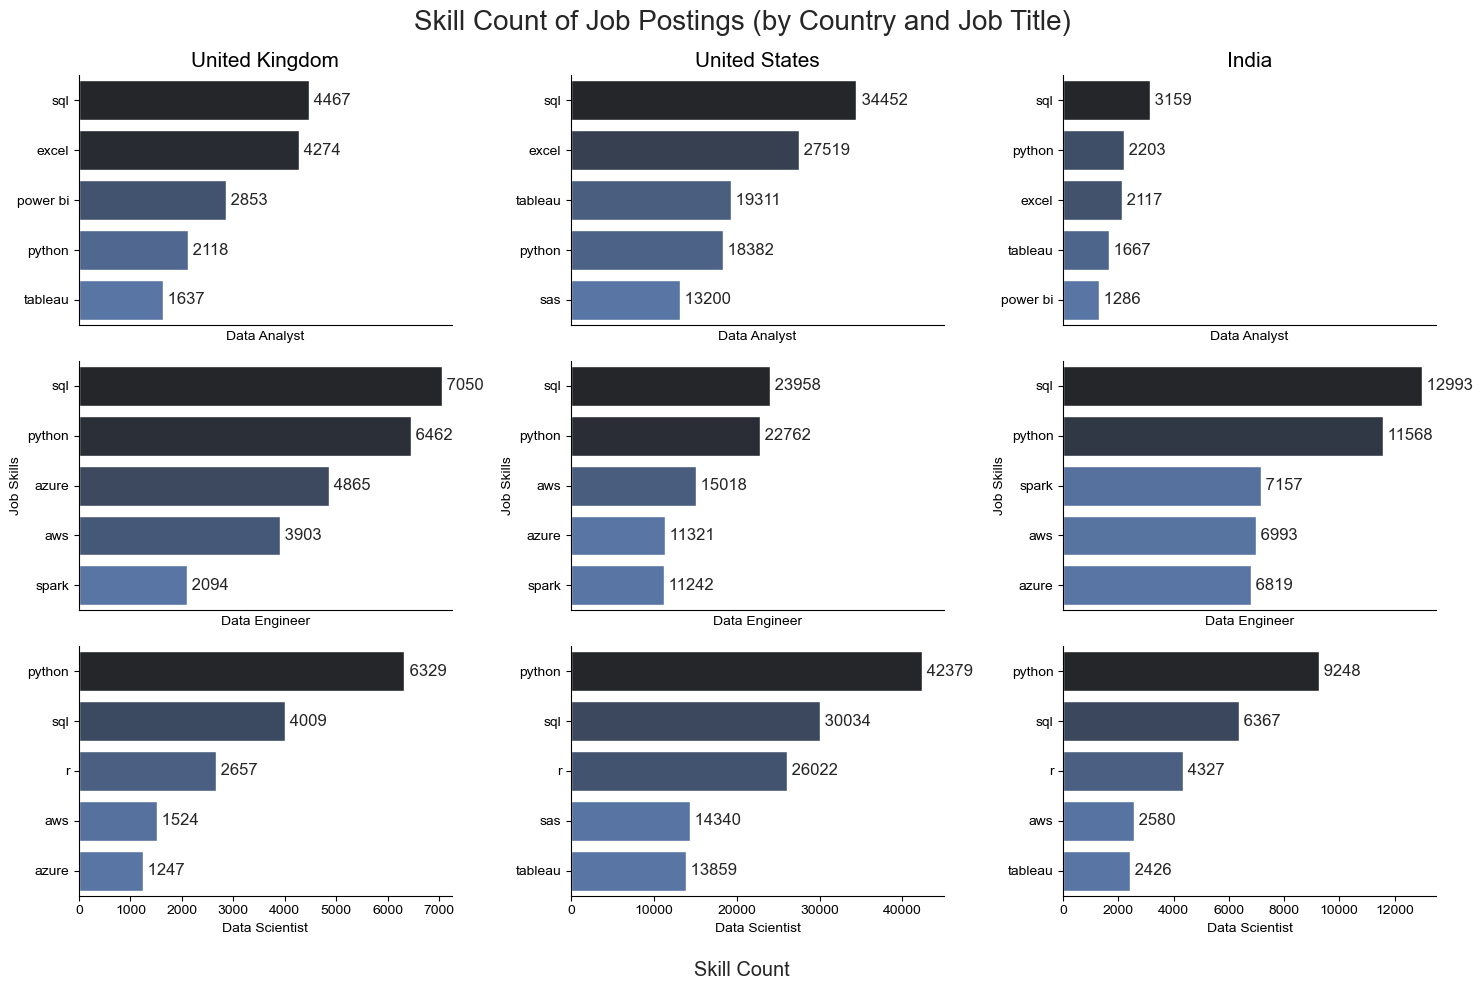

In [5]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_skills_count[(df_skills_count['job_country'] == country) & (df_skills_count['job_title_short'] == job_title)]
        df_plot = df_plot.sort_values(by = 'skill_count', ascending = False).head(5)

# Creation of the Chart Using Seaborn
        sns.barplot(
        data = df_plot,
        x = 'skill_count',
        y = 'job_skills',
        ax = ax[i, j],
        hue = 'skill_count',
        palette = 'dark:b_r',
        legend = False
    )

# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)

# Creates y-Axis Title for Middle Charts 
        if i == 1:
            ax[i, j].set_ylabel('Job Skills')
        else:
            ax[i, j].set_ylabel('')

# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_titles[i])

# Sets Limits for X-Axis to Extend To (To Scale for Each Country)
        ax[i, 0].set_xlim(0, 7250)
        ax[i, 1].set_xlim(0, 45000)
        ax[i, 2].set_xlim(0, 13500)

# Removes the X-Axis Scale for Top and Middle Row Charts
        if i != len(job_titles) - 1:
            ax[i, j].set_xticks([])

# Adds Numbers to Side of Bar for Clarity (No Need for Naked Eye Check)
        for n, v in enumerate(df_plot['skill_count']):
            ax[i, j].text(v + 1, n, f'{v: .0f}', va = 'center')

sns.despine()
fig.suptitle('Skill Count of Job Postings (by Country and Job Title)', fontsize = 20)
fig.supxlabel('Skill Count')
plt.tight_layout()
plt.show()
        

## Part 3 - Calculate the Percentage Likelihood of a Skill Appearing on a Job Posting

- SkillPercent = Probabiltiy to Find Job Skill in Job Posting (%)
- SkillCount = Skill Count in Job Posting
- JobsTotal = Total Count of Job Posting

$SkillPercent = SkillCount / JobsTotal$

### Create Table with Jobs Totals and Merge with Original Skills Count Table

In [6]:
# Table Calculating skill_count Based on job_skill & job_title (Previously Created)
df_skills_count

,job_country,job_title_short,job_skills,skill_count
0,India,Data Analyst,airflow,89
1,India,Data Analyst,alteryx,205
2,India,Data Analyst,angular,11
3,India,Data Analyst,ansible,6
4,India,Data Analyst,arch,8
...,...,...,...,...
1798,United States,Data Scientist,workfront,2
1799,United States,Data Scientist,wrike,1
1800,United States,Data Scientist,xamarin,3
1801,United States,Data Scientist,yarn,119


In [7]:
# Create Loop to Obtain List of Job Totals (Refer to Pre-Exploded Df to Get No. of Job Postings)
jobs_total = []
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):
        df_sum = df_job_ctry[(df_job_ctry['job_country'] == country) & (df_job_ctry['job_title_short'] == job_title)]
        df_sum = df_sum.shape[0]
        jobs_total.append({'job_title_short': job_title,
                           'job_country': country,
                           'jobs_total': df_sum})

In [8]:
# Convert Dictionary to Dataframe
df_jobs_total = pd.DataFrame(jobs_total)
df_jobs_total

,job_title_short,job_country,jobs_total
0,Data Analyst,United Kingdom,10482
1,Data Analyst,United States,67816
2,Data Analyst,India,6121
3,Data Engineer,United Kingdom,11807
4,Data Engineer,United States,35080
5,Data Engineer,India,19062
6,Data Scientist,United Kingdom,9148
7,Data Scientist,United States,58830
8,Data Scientist,India,13279


In [9]:
# Merge Jobs Total and Skills Count Table Together
df_skills_perc = pd.merge(df_skills_count, df_jobs_total, how = 'left', on = ['job_title_short', 'job_country'])
df_skills_perc

,job_country,job_title_short,job_skills,skill_count,jobs_total
0,India,Data Analyst,airflow,89,6121
1,India,Data Analyst,alteryx,205,6121
2,India,Data Analyst,angular,11,6121
3,India,Data Analyst,ansible,6,6121
4,India,Data Analyst,arch,8,6121
...,...,...,...,...,...
1798,United States,Data Scientist,workfront,2,58830
1799,United States,Data Scientist,wrike,1,58830
1800,United States,Data Scientist,xamarin,3,58830
1801,United States,Data Scientist,yarn,119,58830


In [10]:
# Create skill_percent Column in Merged Table to Obtain the Probabilities
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc

,job_country,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,India,Data Analyst,airflow,89,6121,1.454011
1,India,Data Analyst,alteryx,205,6121,3.349126
2,India,Data Analyst,angular,11,6121,0.179709
3,India,Data Analyst,ansible,6,6121,0.098023
4,India,Data Analyst,arch,8,6121,0.130698
...,...,...,...,...,...,...
1798,United States,Data Scientist,workfront,2,58830,0.003400
1799,United States,Data Scientist,wrike,1,58830,0.001700
1800,United States,Data Scientist,xamarin,3,58830,0.005099
1801,United States,Data Scientist,yarn,119,58830,0.202278


## Part 4 - Create a Graph Showing Percentage Likelihood of a Skill Appearing on a job postings

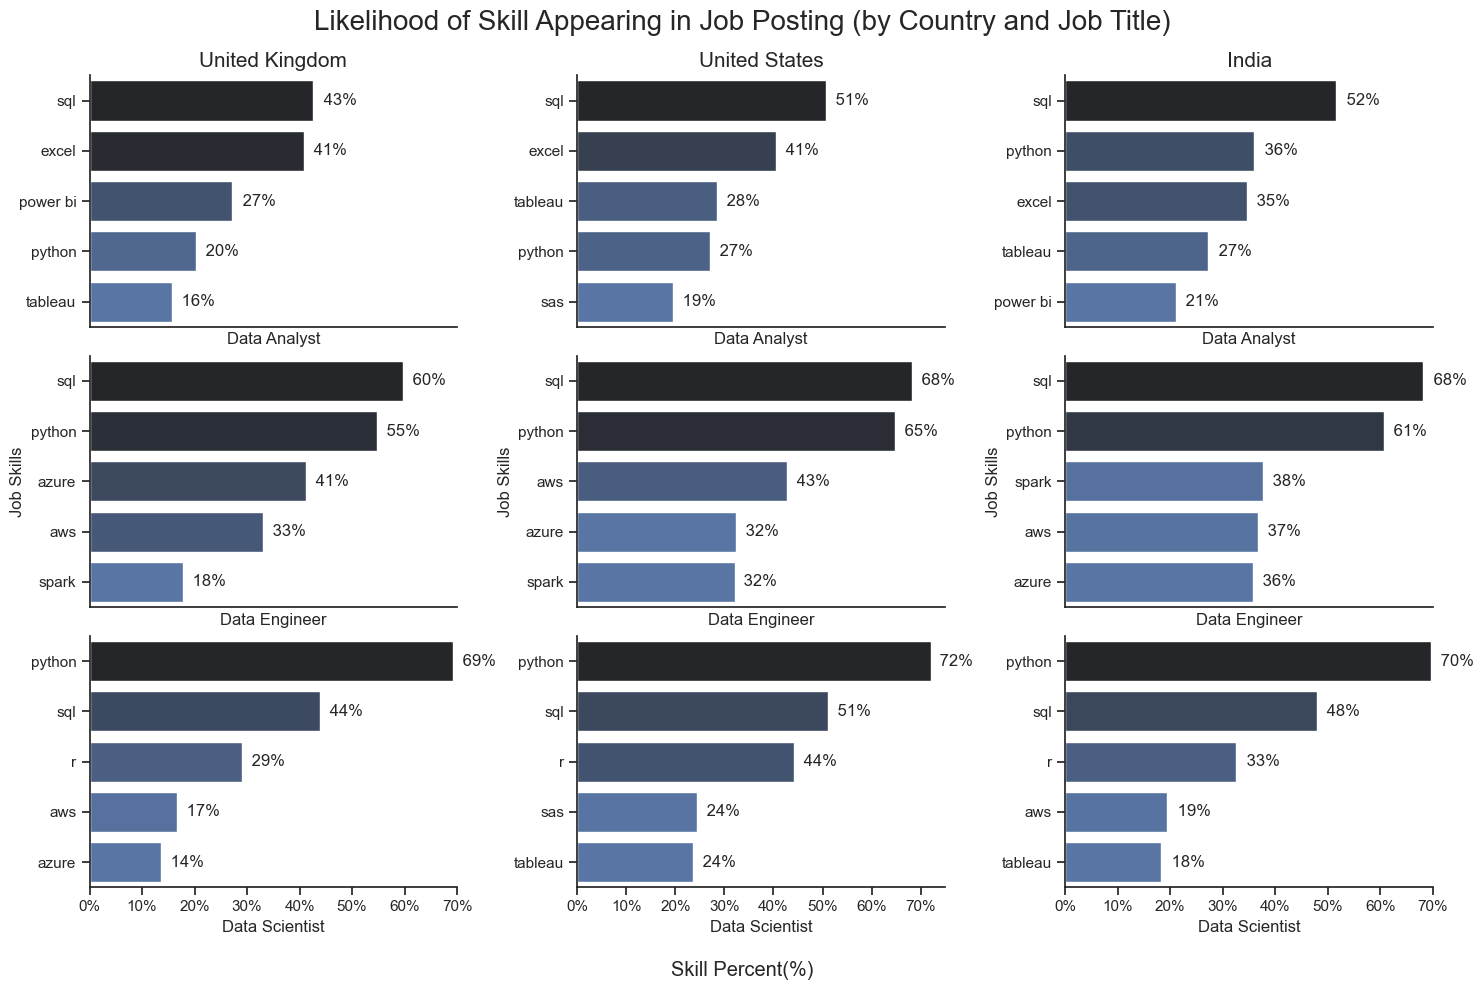

In [11]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_skills_perc[(df_skills_perc['job_country'] == country) & (df_skills_perc['job_title_short'] == job_title)]
        df_plot = df_plot.sort_values(by = 'skill_count', ascending = False).head(5)

# Creation of the Chart Using Seaborn
        sns.barplot(
        data = df_plot,
        x = 'skill_percent',
        y = 'job_skills',
        ax = ax[i, j],
        hue = 'skill_percent',
        palette = 'dark:b_r',
        legend = False
    )
        
# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)

# Creates y-Axis Title for Middle Charts 
        if i == 1:
            ax[i, j].set_ylabel('Job Skills')
        else:
            ax[i, j].set_ylabel('')
        
# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_titles[i])
        
# Sets Limits for X-Axis to Extend To (To Scale for Each Country)
        ax[i, 0].set_xlim(0, 70)
        ax[i, 1].set_xlim(0, 75)
        ax[i, 2].set_xlim(0, 70)

# Makes the X-Axis Scale Change to Percentage Format
        if i == len(job_titles) - 1:
             ax[i, j].xaxis.set_major_formatter(PercentFormatter(xmax = 100, decimals=0))

# Removes the X-Axis Scale for Top and Middle Row Charts
        if i != len(job_titles) - 1:
            ax[i, j].set_xticks([])
        
# Adds Percentages to Side of Bar for Clarity (No Need for Naked Eye Check)
        for n, v in enumerate(df_plot['skill_percent']):
            ax[i, j].text(v + 1, n, f'{v: .0f}%', va = 'center')

sns.despine()
fig.suptitle('Likelihood of Skill Appearing in Job Posting (by Country and Job Title)', fontsize = 20)
fig.supxlabel('Skill Percent(%)')
fig.tight_layout(h_pad = 0.5)
plt.show()